In [520]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import (
    MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler,
    Normalizer, QuantileTransformer, PowerTransformer
)
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tabulate import tabulate
sns.set_theme()

In [521]:
BigDS_df = pd.read_csv('./clean_data/clean_BigDS.csv')

,Unnamed: 0,DiaChi,GiaBan,DuAn,DienTich(m2),TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,0,"D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...",1.70,Ricca,58.00,Đã bàn giao,29.31,2.0,NaN,NaN,NaN,Nội thất đầy đủ,NaN,NaN,NaN,Thành phố Thủ Đức
1,1,"Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...",8.00,Sunrise City,162.75,Chưa bàn giao,49.16,4.0,3.0,8.0,NaN,NaN,NaN,Tây,NaN,Quận 7
2,2,"D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...",1.67,Ricca,56.00,Đã bàn giao,29.82,2.0,1.0,NaN,Đã có sổ,NaN,NaN,NaN,NaN,Thành phố Thủ Đức


In [522]:
BigDS_new_df = BigDS_df[['Quan','DienTich(m2)', 'GiaBan', 'PhongNgu', 'PhongVeSinh', 'TinhTrangBDS', 'TinhTrangGiayTo',
                 'TinhTrangNoiThat', 'HuongBanCong', 'HuongCua']]
BigDS_new_df.head(3)

,Quan,DienTich(m2),GiaBan,PhongNgu,PhongVeSinh,TinhTrangBDS,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua
0,Thành phố Thủ Đức,58.00,1.70,2.0,NaN,Đã bàn giao,NaN,Nội thất đầy đủ,NaN,NaN
1,Quận 7,162.75,8.00,4.0,3.0,Chưa bàn giao,NaN,NaN,NaN,Tây
2,Thành phố Thủ Đức,56.00,1.67,2.0,1.0,Đã bàn giao,Đã có sổ,NaN,NaN,NaN
3,Quận 7,66.60,2.50,2.0,2.0,Đã bàn giao,NaN,NaN,NaN,Bắc
4,Quận 7,162.00,6.50,3.0,3.0,Đã bàn giao,NaN,NaN,Đông,Tây


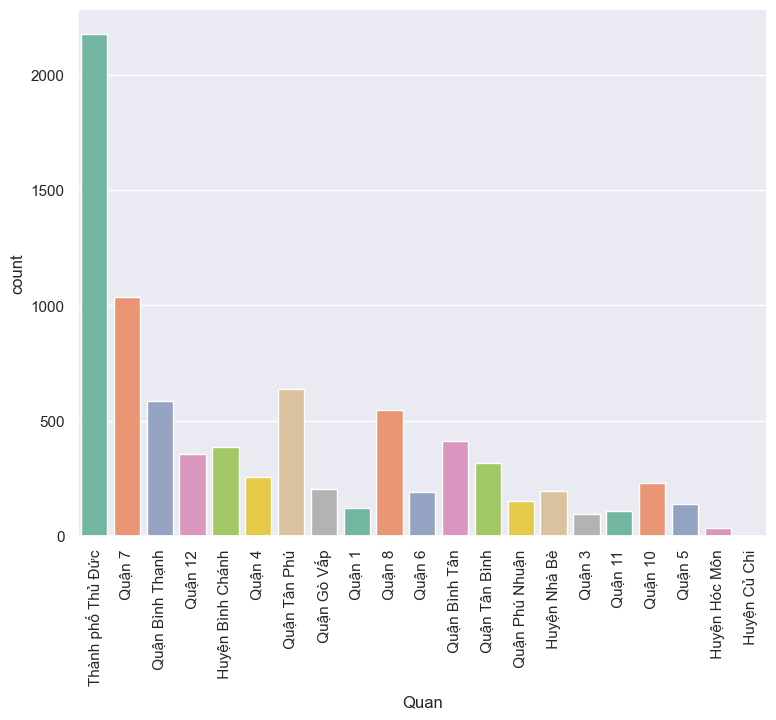

In [523]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
ax1 = sns.countplot(x=BigDS_new_df['Quan'], palette="Set2")
ax1.set_xticklabels(BigDS_new_df['Quan'].unique(), rotation=90)
plt.tight_layout()
plt.show()

=> chuyển qua file clean để làm sạch những nhà có S <

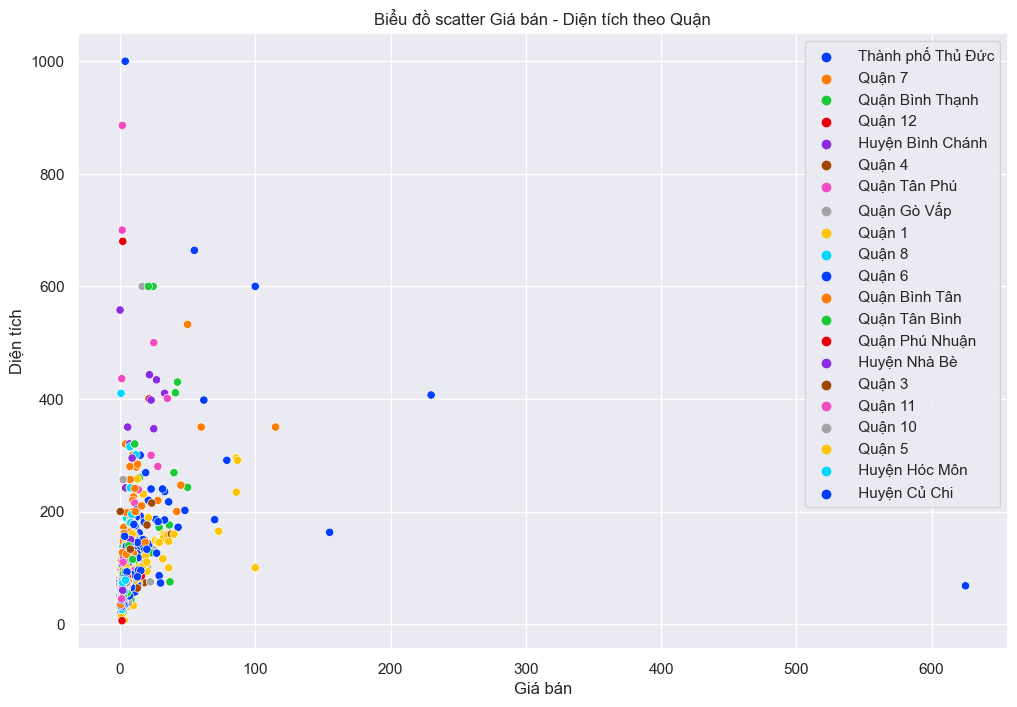

In [524]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GiaBan', y='DienTich(m2)', hue='Quan', data=BigDS_new_df, palette='bright')
plt.xlabel('Giá bán')
plt.ylabel('Diện tích')
plt.title('Biểu đồ scatter Giá bán - Diện tích theo Quận')
plt.legend()
plt.grid(True)
plt.show()

In [525]:
BigDS_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quan              8168 non-null   object 
 1   DienTich(m2)      8168 non-null   float64
 2   GiaBan            8168 non-null   float64
 3   PhongNgu          8168 non-null   float64
 4   PhongVeSinh       6860 non-null   float64
 5   TinhTrangBDS      8168 non-null   object 
 6   TinhTrangGiayTo   2346 non-null   object 
 7   TinhTrangNoiThat  1634 non-null   object 
 8   HuongBanCong      1288 non-null   object 
 9   HuongCua          1943 non-null   object 
dtypes: float64(4), object(6)
memory usage: 638.2+ KB


In [526]:
BigDS_new_df["TinhTrangGiayTo"].unique()

array([nan, 'Đã có sổ', 'Giấy tờ khác', 'Đang chờ sổ'], dtype=object)

In [527]:
BigDS_new_df["TinhTrangBDS"].unique()

array(['Đã bàn giao', 'Chưa bàn giao'], dtype=object)

In [528]:
BigDS_new_df["TinhTrangGiayTo"].unique()

array([nan, 'Đã có sổ', 'Giấy tờ khác', 'Đang chờ sổ'], dtype=object)

In [529]:
BigDS_new_df["Quan"].unique()

array([' Thành phố Thủ Đức', ' Quận 7', ' Quận Bình Thạnh', ' Quận 12',
       ' Huyện Bình Chánh', ' Quận 4', ' Quận Tân Phú', ' Quận Gò Vấp',
       ' Quận 1', ' Quận 8', ' Quận 6', ' Quận Bình Tân',
       ' Quận Tân Bình', ' Quận Phú Nhuận', ' Huyện Nhà Bè', ' Quận 3',
       ' Quận 11', ' Quận 10', ' Quận 5', ' Huyện Hóc Môn',
       ' Huyện Củ Chi'], dtype=object)

In [530]:
BigDS_new_df["TinhTrangNoiThat"].unique()

array(['Nội thất đầy đủ', nan, 'Nhà trống', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

In [531]:
BigDS_new_df["HuongBanCong"].unique()

array([nan, 'Đông', 'Tây', 'Đông Nam', 'Đông Bắc', 'Nam', 'Tây Bắc',
       'Bắc', 'Tây Nam'], dtype=object)

In [532]:
BigDS_new_df["HuongCua"].unique()

array([nan, 'Tây', 'Bắc', 'Nam', 'Tây Bắc', 'Đông', 'Đông Nam', 'Tây Nam',
       'Đông Bắc'], dtype=object)

- Chuyển đổi dữ liệu sang dạng số và xử lý dữ liệu trống


In [533]:
def Convert_TinhTrangBDS(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['TinhTrangBDS'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    BigDS_new_df['TinhTrangBDS'] = BigDS_new_df['TinhTrangBDS'].astype(float)
    return BigDS_new_df

- Xử lý cột 'PhongVeSinh'


In [534]:
# Hàm xử lí giá trị trống    
def Impute_missing_PhongVeSinh(BigDS_new_df, impute_method, BigDS_train = None):
    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_new_df['PhongVeSinh'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_new_df['PhongVeSinh'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_new_df['PhongVeSinh'].median(), inplace=True) 
    else:
        if impute_method == 'mean':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_train['PhongVeSinh'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_train['PhongVeSinh'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['PhongVeSinh'].fillna(BigDS_train['PhongVeSinh'].median(), inplace=True) 
    return BigDS_new_df

- Xử lý cột 'TinhTrangGiayTo'


In [535]:
def Convert_TinhTrangGiayTo(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['TinhTrangGiayTo'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    BigDS_new_df['TinhTrangGiayTo'] = BigDS_new_df['TinhTrangGiayTo'].astype(float)
    return BigDS_new_df

In [536]:
def Impute_missing_TinhTrangGiayTo(BigDS_new_df, impute_method, BigDS_train=None):
    
    BigDS_new_df = Convert_TinhTrangGiayTo(BigDS_new_df)

    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_new_df['TinhTrangGiayTo'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_new_df['TinhTrangGiayTo'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_new_df['TinhTrangGiayTo'].median(), inplace=True)
        
    else:
        if impute_method == 'mean':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_train['TinhTrangGiayTo'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_train['TinhTrangGiayTo'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['TinhTrangGiayTo'].fillna(BigDS_train['TinhTrangGiayTo'].median(), inplace=True) 

    return BigDS_new_df

- Xử lý cột 'TinhTrangNoiThat'


In [537]:
def Convert_TinhTrangNoiThat(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['TinhTrangNoiThat'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    
    BigDS_new_df['TinhTrangNoiThat'] = BigDS_new_df['TinhTrangNoiThat'].astype(float)
    return BigDS_new_df

In [538]:
def Impute_missing_TinhTrangNoiThat(BigDS_new_df, impute_method, BigDS_train=None):
    
    BigDS_new_df = Convert_TinhTrangNoiThat(BigDS_new_df)

    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_new_df['TinhTrangNoiThat'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_new_df['TinhTrangNoiThat'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_new_df['TinhTrangNoiThat'].median(), inplace=True)
        
    else:
        if impute_method == 'mean':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_train['TinhTrangNoiThat'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_train['TinhTrangNoiThat'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['TinhTrangNoiThat'].fillna(BigDS_train['TinhTrangNoiThat'].median(), inplace=True) 

    return BigDS_new_df

- Xử lí cột 'HuongBanCong'


In [539]:
def Convert_HuongBanCong(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['HuongBanCong'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    BigDS_new_df['HuongBanCong'] = BigDS_new_df['HuongBanCong'].astype(float)
    return BigDS_new_df

In [540]:
def Impute_missing_HuongBanCong(BigDS_new_df, impute_method, BigDS_train=None):
    
    BigDS_new_df = Convert_HuongBanCong(BigDS_new_df)

    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_new_df['HuongBanCong'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_new_df['HuongBanCong'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_new_df['HuongBanCong'].median(), inplace=True)
        
    else:
        if impute_method == 'mean':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_train['HuongBanCong'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_train['HuongBanCong'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['HuongBanCong'].fillna(BigDS_train['HuongBanCong'].median(), inplace=True) 

    return BigDS_new_df

- Xử lí trên cột 'HuongCua'


In [541]:
def Convert_HuongCua(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['HuongCua'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    BigDS_new_df['HuongCua'] = BigDS_new_df['HuongCua'].astype(float)
    return BigDS_new_df

In [542]:
def Impute_missing_HuongCua(BigDS_new_df, impute_method, BigDS_train=None):
    
    BigDS_new_df = Convert_HuongCua(BigDS_new_df)

    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['HuongCua'].fillna(BigDS_new_df['HuongCua'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['HuongCua'].fillna(BigDS_new_df['HuongCua'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['HuongCua'].fillna(BigDS_new_df['HuongCua'].median(), inplace=True)
        
    else:
        if impute_method == 'mean':
            BigDS_new_df['HuongCua'].fillna(BigDS_train['HuongCua'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['HuongCua'].fillna(BigDS_train['HuongCua'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['HuongCua'].fillna(BigDS_train['HuongCua'].median(), inplace=True) 

    return BigDS_new_df

- Xử lí dữ liệu trên cột 'Quan'


In [543]:
def Convert_Quan(BigDS_new_df):
    encoder = ce.OrdinalEncoder(cols=['Quan'])
    BigDS_new_df = encoder.fit_transform(BigDS_new_df)
    BigDS_new_df['Quan'] = BigDS_new_df['Quan'].astype(float)
    return BigDS_new_df

In [544]:
def Impute_missing_Quan(BigDS_new_df, impute_method, BigDS_train=None):
    
    BigDS_new_df = Convert_Quan(BigDS_new_df)

    if BigDS_train is None:
        if impute_method == 'mean':
            BigDS_new_df['Quan'].fillna(BigDS_new_df['Quan'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['Quan'].fillna(BigDS_new_df['Quan'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['Quan'].fillna(BigDS_new_df['Quan'].median(), inplace=True)
        
    else:
        if impute_method == 'mean':
            BigDS_new_df['Quan'].fillna(BigDS_train['Quan'].mean(), inplace=True)
        elif impute_method == 'mode':
            BigDS_new_df['Quan'].fillna(BigDS_train['Quan'].mode()[0], inplace=True)
        elif impute_method == 'median':
            BigDS_new_df['Quan'].fillna(BigDS_train['Quan'].median(), inplace=True) 

    return BigDS_new_df

In [545]:
BigDS_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quan              8168 non-null   object 
 1   DienTich(m2)      8168 non-null   float64
 2   GiaBan            8168 non-null   float64
 3   PhongNgu          8168 non-null   float64
 4   PhongVeSinh       6860 non-null   float64
 5   TinhTrangBDS      8168 non-null   object 
 6   TinhTrangGiayTo   2346 non-null   object 
 7   TinhTrangNoiThat  1634 non-null   object 
 8   HuongBanCong      1288 non-null   object 
 9   HuongCua          1943 non-null   object 
dtypes: float64(4), object(6)
memory usage: 638.2+ KB


In [546]:
X_BigDS = BigDS_new_df.drop(columns=['GiaBan'])
y_BigDS = np.log(BigDS_new_df['GiaBan'])
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_BigDS,y_BigDS,test_size=0.4,random_state=20)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=20)

- Xử lí trên cột 'PhongVeSinh'


In [547]:
X_train_b = Impute_missing_PhongVeSinh(X_train_b,'median')
X_test_b = Impute_missing_PhongVeSinh(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_PhongVeSinh(X_val_b,'median',X_train_b)

- Xử lí trên cột 'TinhTrangGiayTo'


In [548]:
X_train_b = Impute_missing_TinhTrangGiayTo(X_train_b,'median')
X_test_b = Impute_missing_TinhTrangGiayTo(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_TinhTrangGiayTo(X_val_b,'median',X_train_b)

- Xử lí trên cột 'TinhTrangNoiThat'


In [549]:
X_train_b = Impute_missing_TinhTrangNoiThat(X_train_b,'median')
X_test_b = Impute_missing_TinhTrangNoiThat(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_TinhTrangNoiThat(X_val_b,'median',X_train_b)

- Xử lí trên cột 'HuongBanCong'


In [550]:
X_train_b = Impute_missing_HuongBanCong(X_train_b,'median')
X_test_b = Impute_missing_HuongBanCong(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_HuongBanCong(X_val_b,'median',X_train_b)

- Xử lí trên cột 'HuongCua'


In [551]:
X_train_b = Impute_missing_HuongCua(X_train_b,'median')
X_test_b = Impute_missing_HuongCua(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_HuongCua(X_val_b,'median',X_train_b)

- Xử lí trên cột 'Quan'


In [552]:
X_train_b = Impute_missing_Quan(X_train_b,'median')
X_test_b = Impute_missing_Quan(X_test_b,'median',X_train_b)
X_val_b = Impute_missing_Quan(X_val_b,'median',X_train_b)

- Xử lí cột 'TinhTrangBDS'


In [553]:
X_train_b = Convert_TinhTrangBDS(X_train_b)
X_test_b = Convert_TinhTrangBDS(X_test_b)
X_val_b = Convert_TinhTrangBDS(X_val_b)


In [554]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 5707 to 7523
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quan              4900 non-null   float64
 1   DienTich(m2)      4900 non-null   float64
 2   PhongNgu          4900 non-null   float64
 3   PhongVeSinh       4900 non-null   float64
 4   TinhTrangBDS      4900 non-null   float64
 5   TinhTrangGiayTo   4900 non-null   float64
 6   TinhTrangNoiThat  4900 non-null   float64
 7   HuongBanCong      4900 non-null   float64
 8   HuongCua          4900 non-null   float64
dtypes: float64(9)
memory usage: 382.8 KB


In [555]:
X_test_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 7582 to 2762
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quan              1634 non-null   float64
 1   DienTich(m2)      1634 non-null   float64
 2   PhongNgu          1634 non-null   float64
 3   PhongVeSinh       1634 non-null   float64
 4   TinhTrangBDS      1634 non-null   float64
 5   TinhTrangGiayTo   1634 non-null   float64
 6   TinhTrangNoiThat  1634 non-null   float64
 7   HuongBanCong      1634 non-null   float64
 8   HuongCua          1634 non-null   float64
dtypes: float64(9)
memory usage: 127.7 KB


In [556]:
X_val_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 3048 to 7355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quan              1634 non-null   float64
 1   DienTich(m2)      1634 non-null   float64
 2   PhongNgu          1634 non-null   float64
 3   PhongVeSinh       1634 non-null   float64
 4   TinhTrangBDS      1634 non-null   float64
 5   TinhTrangGiayTo   1634 non-null   float64
 6   TinhTrangNoiThat  1634 non-null   float64
 7   HuongBanCong      1634 non-null   float64
 8   HuongCua          1634 non-null   float64
dtypes: float64(9)
memory usage: 127.7 KB


In [557]:
train_data = X_train_b.join(y_train_b)

array([[<AxesSubplot:title={'center':'Quan'}>,
        <AxesSubplot:title={'center':'DienTich(m2)'}>,
        <AxesSubplot:title={'center':'PhongNgu'}>],
       [<AxesSubplot:title={'center':'PhongVeSinh'}>,
        <AxesSubplot:title={'center':'TinhTrangBDS'}>,
        <AxesSubplot:title={'center':'TinhTrangGiayTo'}>],
       [<AxesSubplot:title={'center':'TinhTrangNoiThat'}>,
        <AxesSubplot:title={'center':'HuongBanCong'}>,
        <AxesSubplot:title={'center':'HuongCua'}>]], dtype=object)

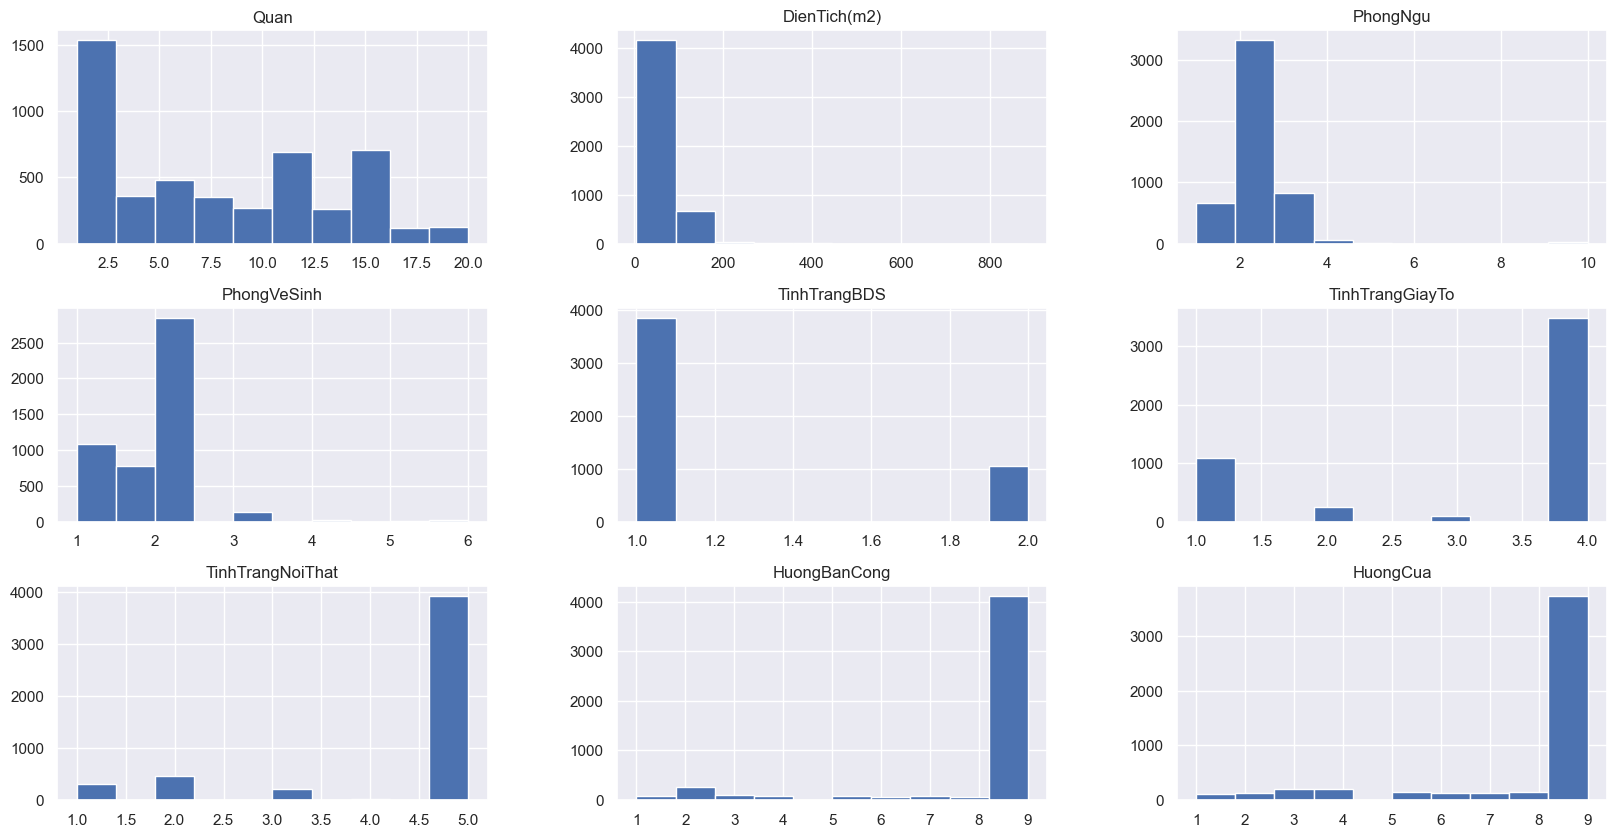

In [558]:
X_train_b.hist(figsize=(20,10))

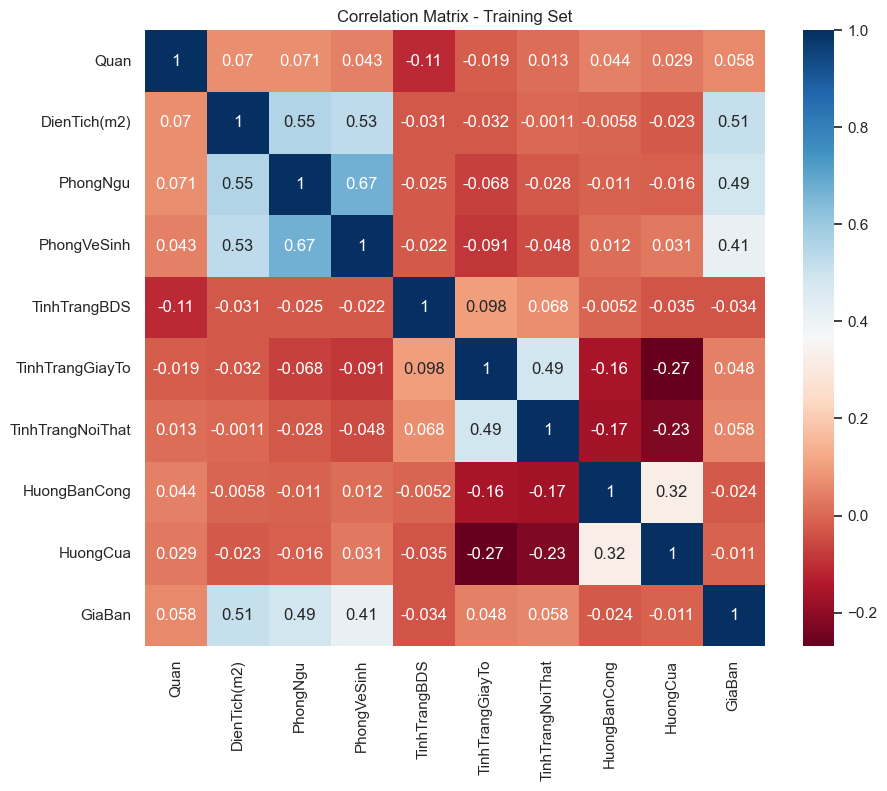

In [559]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train_b.copy()
correlation_matrix['GiaBan'] = y_train_b
correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(10, 8))  # Đặt kích thước của figure
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')  # Vẽ heatmap với ma trận tương quan
plt.title('Correlation Matrix - Training Set')  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ


In [560]:
k_best = SelectKBest(f_regression, k=5)
X_train_belected = k_best.fit_transform(X_train_b, y_train_b)
selected_features = X_train_b.columns[k_best.get_support()]
X_val_belected = k_best.transform(X_val_b)
X_test_belected = k_best.transform(X_test_b)
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Quan', 'DienTich(m2)', 'PhongNgu', 'PhongVeSinh', 'TinhTrangNoiThat'], dtype='object')


### Lựa chọn đặc trưng

In [561]:
X_train_b = X_train_b[['DienTich(m2)', 'PhongNgu', 'PhongVeSinh','Quan','TinhTrangGiayTo']]
X_val_b = X_val_b[['DienTich(m2)', 'PhongNgu', 'PhongVeSinh','Quan','TinhTrangGiayTo']]
X_test_b = X_test_b[['DienTich(m2)', 'PhongNgu', 'PhongVeSinh','Quan','TinhTrangGiayTo']]


### Xem tác động các tính năng đến giá bán

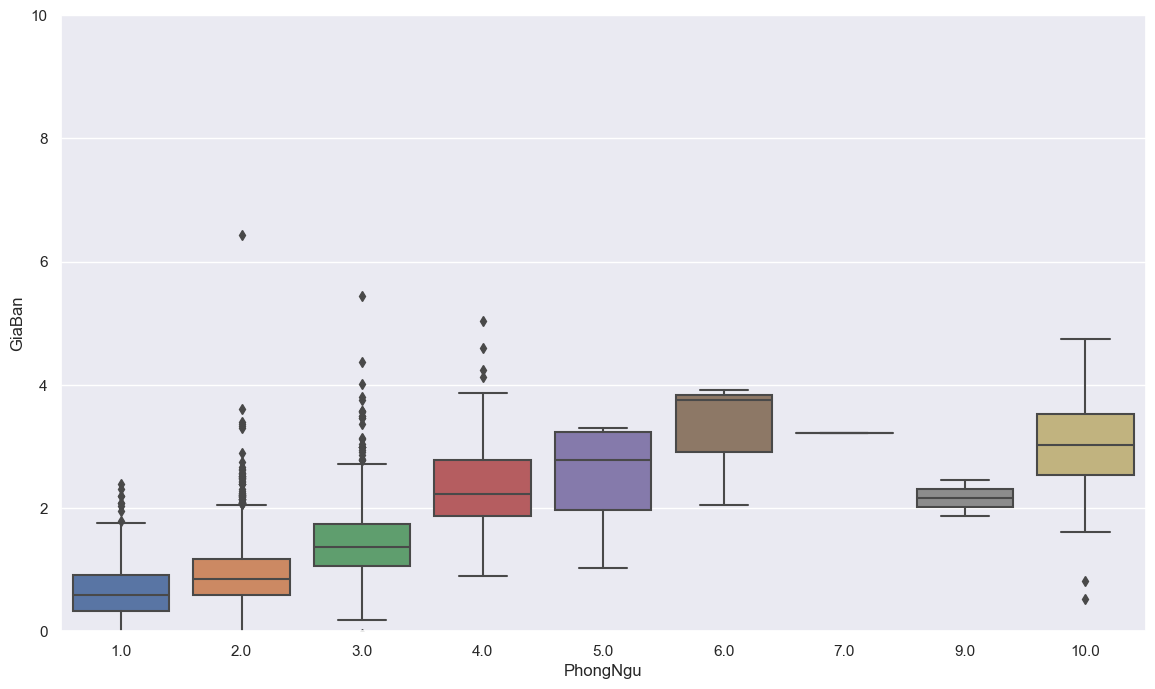

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'PhongNgu'
data = pd.concat([y_train_b, X_train_b['PhongNgu']], axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x=var, y=y_train_b, data=data)
plt.ylim(0, 10)  # Giới hạn trục y từ 0 đến 70

plt.show()


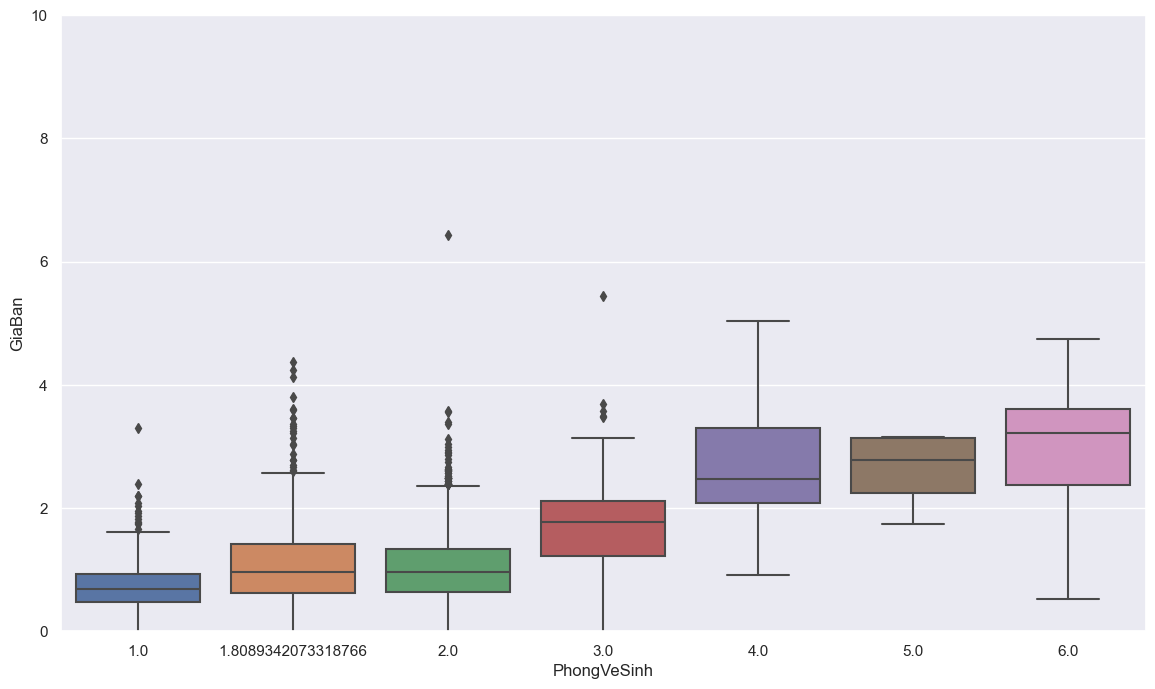

In [563]:

var = 'PhongVeSinh'
data = pd.concat([y_train_b, X_train_b['PhongVeSinh']], axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x=var, y=y_train_b, data=data)
plt.ylim(0, 10)  # Giới hạn trục y từ 0 đến 70

plt.show()

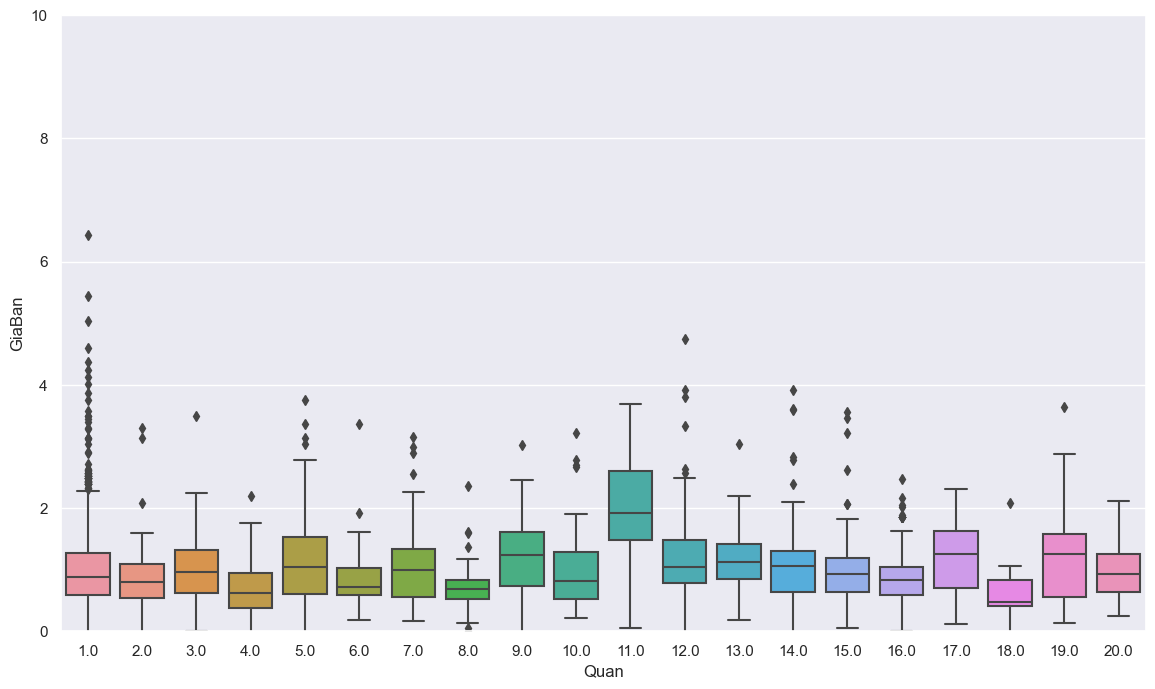

In [564]:

var = 'Quan'
data = pd.concat([y_train_b, X_train_b['Quan']], axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x=var, y=y_train_b, data=data)
plt.ylim(0, 10)  # Giới hạn trục y từ 0 đến 70

plt.show()


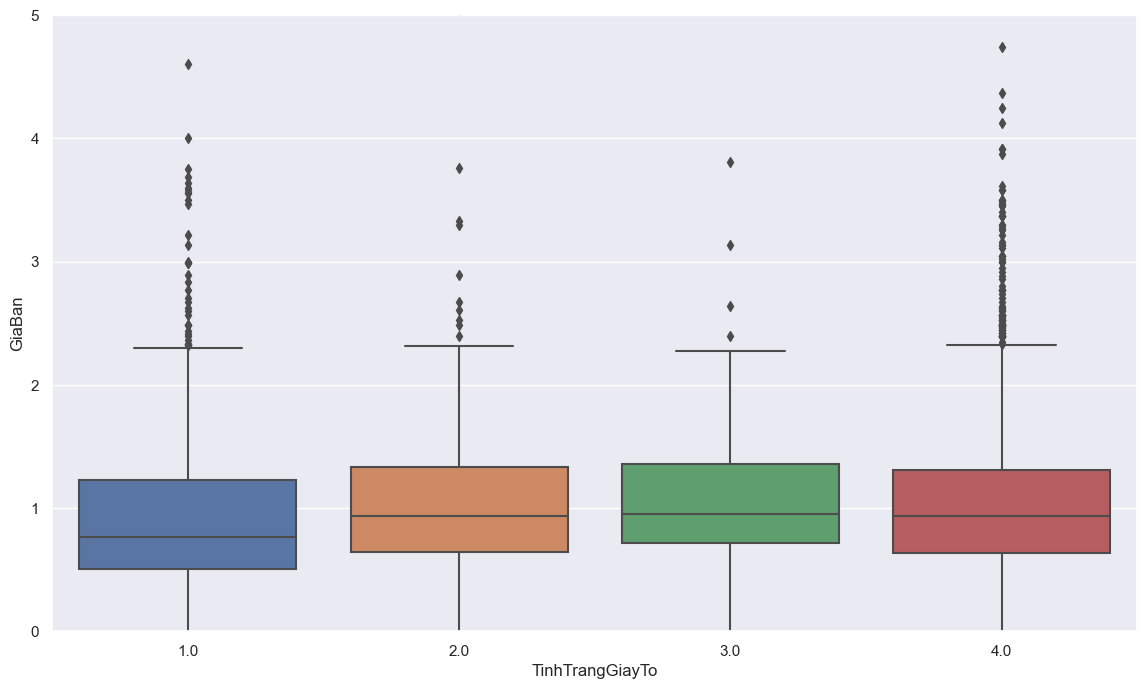

In [565]:

var = 'TinhTrangGiayTo'
data = pd.concat([y_train_b, X_train_b['TinhTrangGiayTo']], axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x=var, y=y_train_b, data=data)
plt.ylim(0, 5)  # Giới hạn trục y từ 0 đến 70

plt.show()


### Xử lý ngoại lệ cột 'DienTich(m2)'

In [566]:
norm_upper_limit_train = X_train_b['DienTich(m2)'].mean() + 3 * X_train_b['DienTich(m2)'].std()
norm_lower_limit_train = X_train_b['DienTich(m2)'].mean() - 3 * X_train_b['DienTich(m2)'].std()

In [567]:
norm_upper_limit_test = X_test_b['DienTich(m2)'].mean() + 3 * X_test_b['DienTich(m2)'].std()
norm_lower_limit_test = X_test_b['DienTich(m2)'].mean() - 3 * X_test_b['DienTich(m2)'].std()

In [568]:
norm_upper_limit_val = X_val_b['DienTich(m2)'].mean() + 3 * X_val_b['DienTich(m2)'].std()
norm_lower_limit_val = X_val_b['DienTich(m2)'].mean() - 3 * X_val_b['DienTich(m2)'].std()

In [569]:
df_normal_new_train = X_train_b[(X_train_b['DienTich(m2)'] > norm_lower_limit_train) & ( X_train_b['DienTich(m2)'] < norm_upper_limit_train)]

In [570]:
df_normal_new_test = X_test_b[(X_test_b['DienTich(m2)'] > norm_lower_limit_test) & ( X_test_b['DienTich(m2)'] < norm_upper_limit_test)]

In [571]:
df_normal_new_val = X_val_b[(X_val_b['DienTich(m2)'] > norm_lower_limit_val) & ( X_val_b['DienTich(m2)'] < norm_upper_limit_val)]

In [572]:
print("Before Triming Size:", X_train_b.shape[0])
print("After Triming Size:", df_normal_new_train.shape[0])

Before Triming Size: 4900
After Triming Size: 4849


<AxesSubplot:>

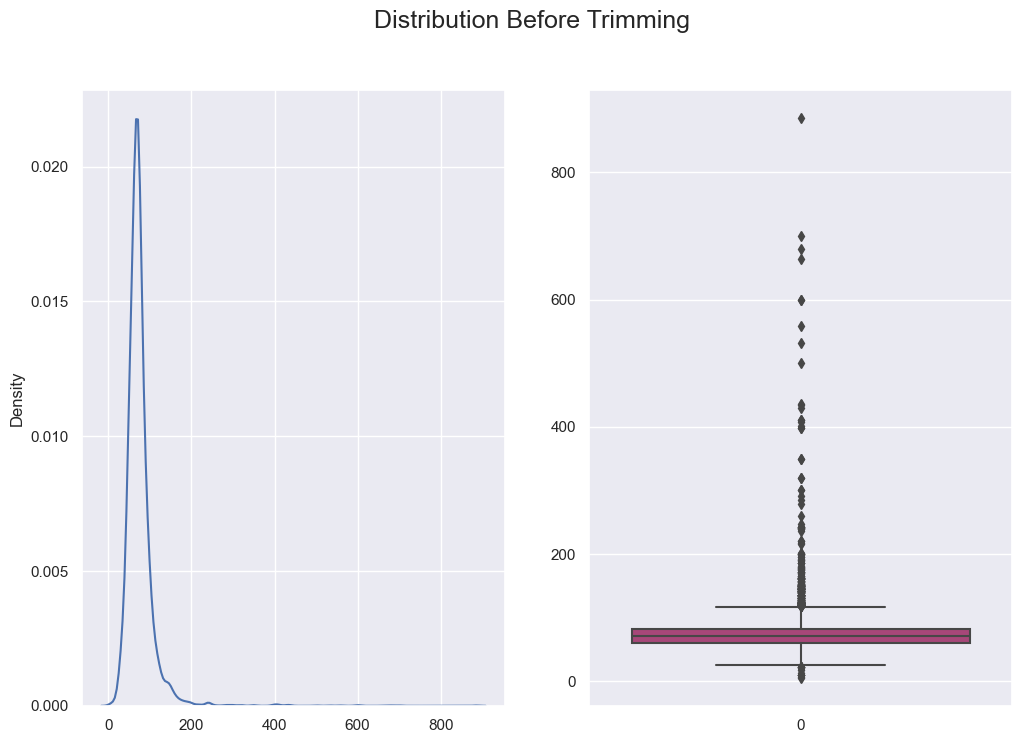

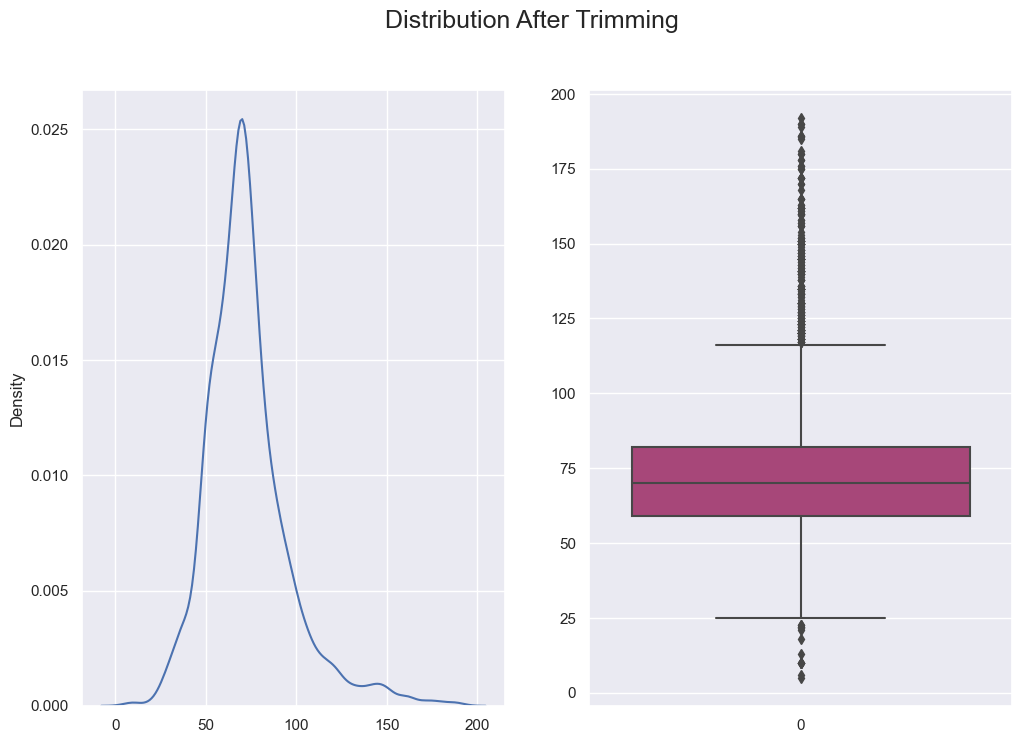

In [573]:
# Before Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution Before Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = X_train_b['DienTich(m2)'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_b['DienTich(m2)'].values, palette = "magma")

# After Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution After Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = df_normal_new_train['DienTich(m2)'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = df_normal_new_train['DienTich(m2)'].values, palette = "magma")

In [574]:
def scaler_transform(X_train,X_test,X_val,scaler_type):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'min_max':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxabs':
        scaler = MaxAbsScaler()
    elif scaler_type == 'norma':
        scaler = Normalizer()
    elif scaler_type == 'quantil':
        scaler = QuantileTransformer(n_quantiles=620)
    elif scaler_type == 'powert':
        scaler = PowerTransformer()
    else:
        raise ValueError('Scaler not recognized')
    X_train_tranformed =  pd.DataFrame(scaler.fit_transform(X_train))
    X_test_tranformed  =  pd.DataFrame(scaler.transform(X_test))
    X_val_tranformed   =  pd.DataFrame(scaler.transform(X_val))
    return X_train_tranformed,X_test_tranformed,X_val_tranformed

In [575]:
X_train_b

,DienTich(m2),PhongNgu,PhongVeSinh,Quan,TinhTrangGiayTo
5707,71.0,2.0,2.000000,1.0,4.0
443,50.0,2.0,2.000000,2.0,4.0
5317,68.0,2.0,2.000000,1.0,4.0
4544,104.0,3.0,2.000000,3.0,1.0
4329,60.0,2.0,1.808934,4.0,4.0
...,...,...,...,...,...
7068,74.8,2.0,1.000000,10.0,4.0
7391,64.0,3.0,1.808934,7.0,4.0
4367,118.0,3.0,2.000000,5.0,1.0
2522,72.0,2.0,2.000000,15.0,1.0


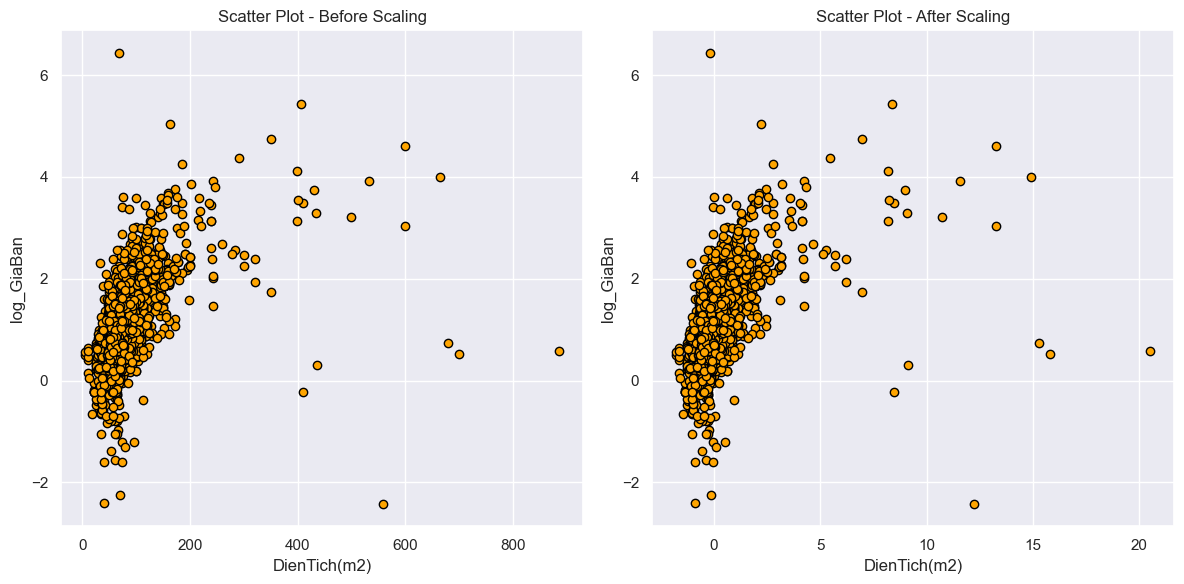

In [576]:
# Khởi tạo khung subplot
fig, axes = plt.subplots(1,2 ,figsize=(12, 6))



axes[0].scatter(X_train_b['DienTich(m2)'], y_train_b,facecolor='orange', edgecolor='black')
axes[0].set_xlabel('DienTich(m2)')
axes[0].set_ylabel('log_GiaBan')
axes[0].set_title('Scatter Plot - Before Scaling')


X_train_b, X_test_b, X_val_b = scaler_transform(X_train_b, X_test_b, X_val_b,'standard')
axes[1].scatter(X_train_b[0], y_train_b,facecolor='orange', edgecolor='black')
axes[1].set_xlabel('DienTich(m2)')
axes[1].set_ylabel('log_GiaBan')
axes[1].set_title('Scatter Plot - After Scaling')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


MAE và MSE là hai độ đo đánh giá mức độ chính xác của mô hình dự đoán so với giá trị thực tế.

MAE (Mean Absolute Error): là trung bình cộng của giá trị tuyệt đối của sai số giữa giá trị dự đoán và giá trị thực tế. MAE càng thấp thì mô hình dự đoán càng chính xác.

MSE (Mean Squared Error): là trung bình cộng của bình phương sai số giữa giá trị dự đoán và giá trị thực tế. MSE càng thấp thì mô hình dự đoán càng chính xác.

### Sử dụng mô hình LinearRegression

In [577]:
X_train_linear=X_train_b.copy()
X_test_linear=X_test_b.copy()
X_val_linear=X_val_b.copy()
y_train_linear=y_train_b.copy()
y_test_linear=y_test_b.copy()
y_val_linear=y_val_b.copy()

In [578]:
model = LinearRegression()
model.fit(X_train_linear, y_train_linear)

y_val_pred = model.predict(X_val_linear)
r2_val_before = r2_score(y_val_linear, y_val_pred).round(5)

y_test_pred = model.predict(X_test_linear)
r2_test_before = r2_score(y_test_linear, y_test_pred).round(5)

mae_val_before = mean_absolute_error(y_val_linear, y_val_pred).round(5)
mae_test_before = mean_absolute_error(y_test_linear, y_test_pred).round(5)

mse_val_before = mean_squared_error(y_val_linear,y_val_pred).round(5)
mse_test_before = mean_squared_error(y_test_linear,y_test_pred).round(5)

rmse_val_before = mean_squared_error(y_val_linear, y_val_pred, squared=False).round(5)
rmse_test_before = mean_squared_error(y_test_linear, y_test_pred, squared=False).round(5)

print("r2_score in validation:", r2_val_before)
print("r2_score in test:", r2_test_before)
print()
print("Test error (MAE) in validation: {}".format(mae_val_before))
print("Test error (MAE) in test: {}".format(mae_test_before))
print()
print("Test error (MSE) in validation: {}".format(mse_val_before))
print("Test error (MSE) in test: {}".format(mse_test_before))
print()
print("Test error (RMSE) in validation: {}".format(rmse_val_before))
print("Test error (RMSE) in test: {}".format(rmse_test_before))
print()
df = pd.DataFrame({'Giá trị nhãn đúng': y_val_linear, 'Nhãn dự đoán': y_val_pred, 'Chênh lệch': abs(y_val_linear - y_val_pred)})
print(df)

r2_score in validation: 0.25915
r2_score in test: 0.37041

Test error (MAE) in validation: 0.34839
Test error (MAE) in test: 0.35566

Test error (MSE) in validation: 0.24849
Test error (MSE) in test: 0.24214

Test error (RMSE) in validation: 0.49849
Test error (RMSE) in test: 0.49208

      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
3048           0.667829      0.690620    0.022791
3591           1.085189      1.023898    0.061291
4967           0.530628      0.844678    0.314050
303            0.963174      0.611949    0.351225
7099           0.832909      0.618914    0.213995
...                 ...           ...         ...
2022           1.420696      0.976176    0.444520
2530           0.506818      0.796660    0.289843
4235           1.481605      0.805630    0.675975
4141           0.470004      0.441960    0.028043
7355           0.641854      0.582013    0.059841

[1634 rows x 3 columns]


* Hiệu chỉnh mô hình 

In [579]:
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False] 
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_linear, y_train_linear)
best_model = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'fit_intercept': True}


* Truyền tham số tốt nhất vào để chạy trên tập test

In [580]:
model = LinearRegression( fit_intercept = True)
model.fit(X_train_linear, y_train_linear)

y_val_pred = model.predict(X_val_linear)
r2_val_after = r2_score(y_val_linear, y_val_pred)

y_test_pred = model.predict(X_test_linear)
r2_test_after = r2_score(y_test_linear, y_test_pred)

mae_test_after = mean_absolute_error(y_test_linear,y_test_pred).round(5)
mae_val_after = mean_absolute_error(y_val_linear,y_val_pred).round(5)

mse_test_after = mean_squared_error(y_test_linear,y_test_pred).round(5)
mse_val_after = mean_squared_error(y_val_linear,y_val_pred).round(5)

rmse_test_after = mean_squared_error(y_test_linear,y_test_pred,squared = False).round(5)
rmse_val_after = mean_squared_error(y_val_linear,y_test_pred,squared = False).round(5)

print("R2-score in  validation:", r2_val_after)
print("R2-score in test:", r2_test_after)
print()
print("Test error (MAE) in test: {}".format(mae_test_after))
print("Test error (MAE) in validation: {}".format(mae_val_after))
print()
print("Test error (MSE) in test: {}".format(mse_test_after))
print("Test error (MSE) in validation: {}".format(mse_val_after))
print()
print("Test error (RMSE) in test: {}".format(rmse_test_after))
print("Test error (RMSE) in validation: {}".format(rmse_val_after))
print()
df = pd.DataFrame({'Giá trị nhãn đúng': y_test_linear, 'Nhãn dự đoán': y_test_pred,'Chênh lệch': abs(y_test_linear-y_test_pred)})
print(df)


R2-score in  validation: 0.2591518524630452
R2-score in test: 0.3704112153366307

Test error (MAE) in test: 0.35566
Test error (MAE) in validation: 0.34839

Test error (MSE) in test: 0.24214
Test error (MSE) in validation: 0.24849

Test error (RMSE) in test: 0.49208
Test error (RMSE) in validation: 0.66954

      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
7582           1.047319      1.146881    0.099562
1090           1.887070      1.317340    0.569730
6008           0.530628      0.668270    0.137642
3773           1.223775      0.940904    0.282871
6473           1.713798      1.642429    0.071369
...                 ...           ...         ...
668            0.500775      0.818324    0.317548
7535           0.614585      0.913146    0.298561
7124           0.693147      1.026266    0.333119
7474           0.765468      0.715842    0.049626
2762           0.974560      1.150162    0.175603

[1634 rows x 3 columns]


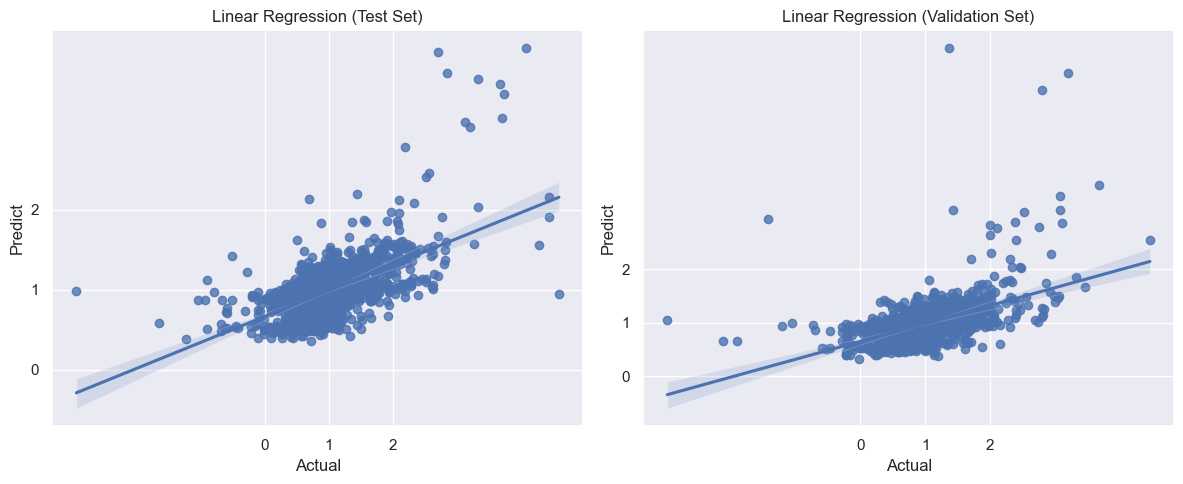

In [581]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ về dự đoán và giá trị thực tế trên tập kiểm tra
ax1 = axes[0]
sns.regplot(x=y_test_linear, y=y_test_pred, ax=ax1)
ax1.set_title('Linear Regression (Test Set)')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predict')
ax1.set_xticks(range(0, 3, 1))
ax1.set_yticks(range(0, 3, 1))

# Biểu đồ về dự đoán và giá trị thực tế trên tập validation
ax2 = axes[1]
sns.regplot(x=y_val_linear, y=y_val_pred, ax=ax2)
ax2.set_title('Linear Regression (Validation Set)')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predict')
ax2.set_xticks(range(0, 3, 1))
ax2.set_yticks(range(0, 3, 1))

plt.tight_layout()
plt.show()


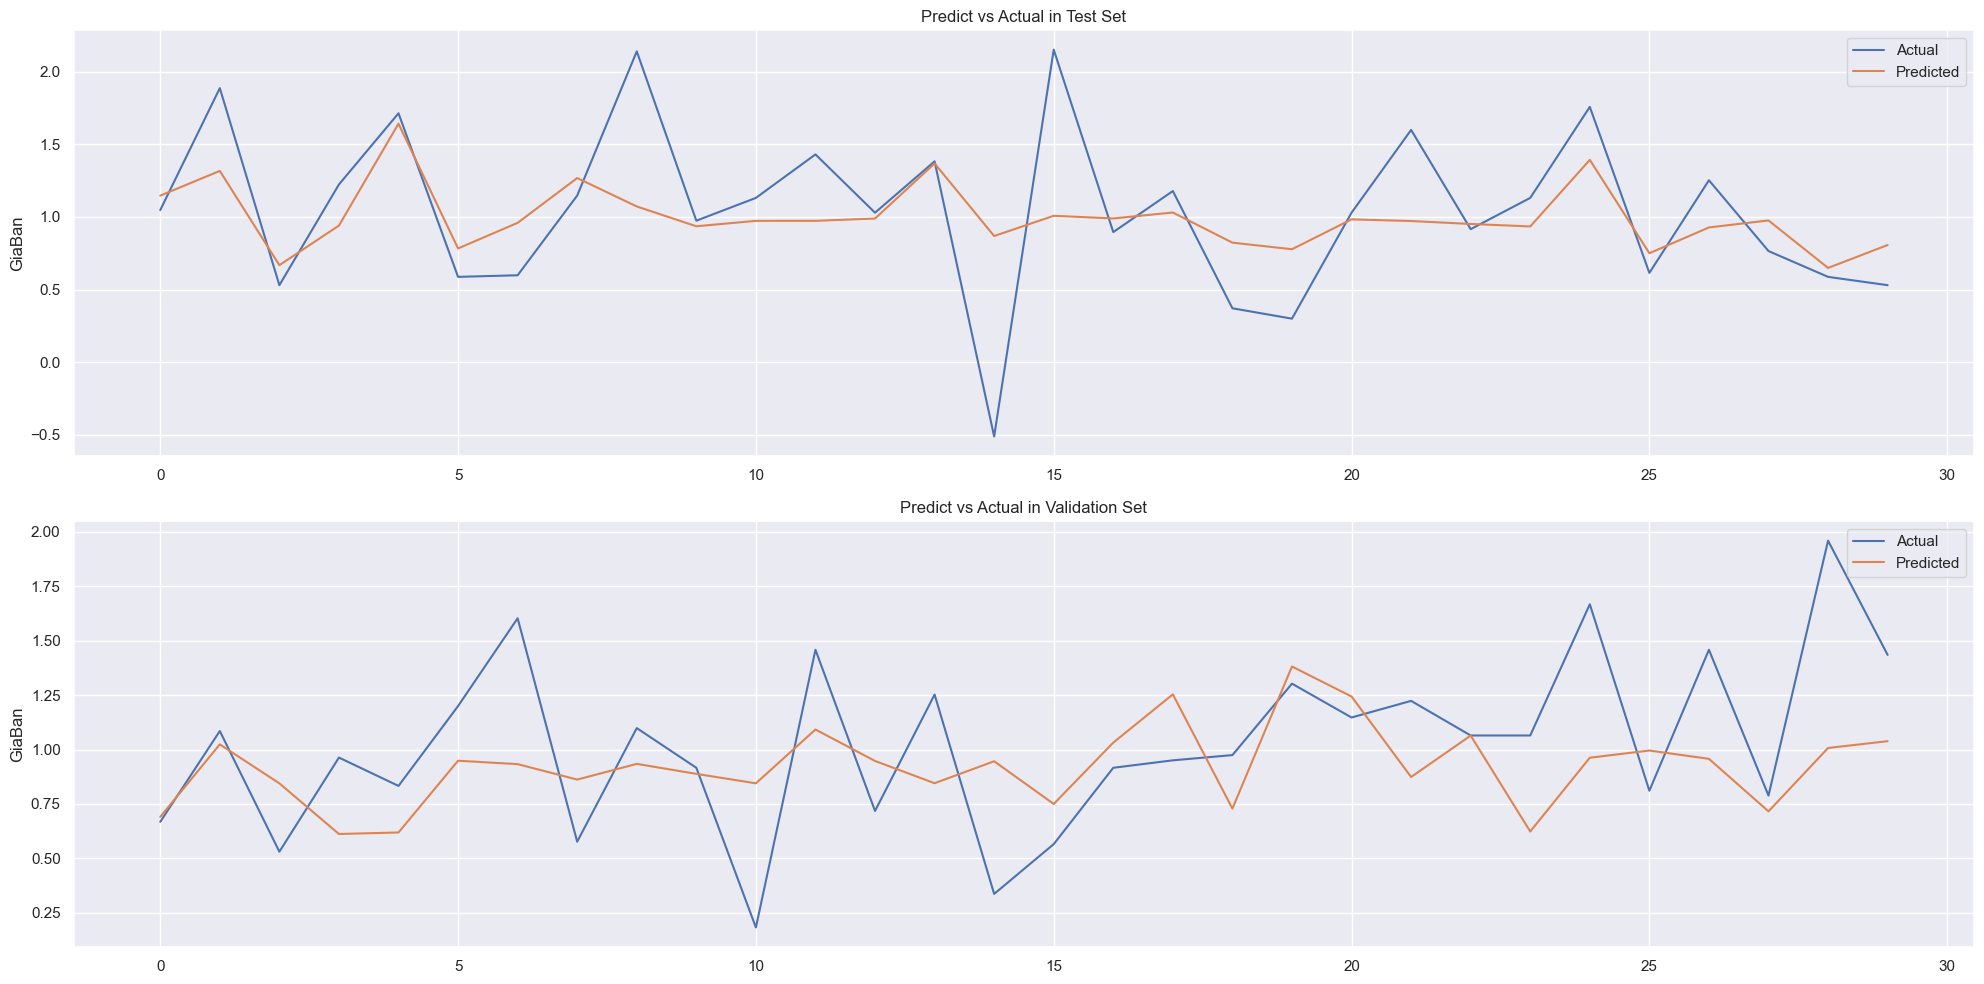

In [582]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Biểu đồ cho tập kiểm tra
axes[0].set_ylabel("GiaBan")
axes[0].set_title('Predict vs Actual in Test Set')
axes[0].plot(np.array(y_test_linear[:30]), label='Actual')
axes[0].plot(y_test_pred[:30], label='Predicted')
axes[0].legend()

# Biểu đồ cho tập validation
axes[1].set_ylabel("GiaBan")
axes[1].set_title('Predict vs Actual in Validation Set')
axes[1].plot(np.array(y_val_linear[:30]), label='Actual')
axes[1].plot(y_val_pred[:30], label='Predicted')
axes[1].legend()

plt.tight_layout()
plt.show()


In [583]:

# Tạo DataFrame chứa các giá trị trước và sau tối ưu
data = {'Metric': ['R2-score', 'MAE', 'MSE', 'RMSE'],
        'Before Optimization (Validation)': [r2_val_before, mae_val_before, mse_val_before, rmse_val_before],
        'After Optimization (Validation)': [r2_val_after, mae_val_after, mse_val_after, rmse_val_after],
        'Before Optimization (Test)': [r2_test_before, mae_test_before, mse_test_before, rmse_test_before],
        'After Optimization (Test)': [r2_test_after, mae_test_after, mse_test_after, rmse_test_after]}

# In bảng so sánh các giá trị trước và sau tối ưu
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))
print()



╒══════════╤════════════════════════════════════╤═══════════════════════════════════╤══════════════════════════════╤═════════════════════════════╕
│ Metric   │   Before Optimization (Validation) │   After Optimization (Validation) │   Before Optimization (Test) │   After Optimization (Test) │
╞══════════╪════════════════════════════════════╪═══════════════════════════════════╪══════════════════════════════╪═════════════════════════════╡
│ R2-score │                            0.25915 │                          0.259152 │                      0.37041 │                    0.370411 │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼─────────────────────────────┤
│ MAE      │                            0.34839 │                          0.34839  │                      0.35566 │                    0.35566  │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼──

### Sử dụng mô hình RandomForestRegressor

In [584]:
X_train_randomforest=X_train_b.copy()
X_test_randomforest=X_test_b.copy()
X_val_randomforest=X_val_b.copy()

y_train_randomforest=y_train_b.copy()
y_test_randomforest=y_test_b.copy()
y_val_randomforest=y_val_b.copy()

In [585]:
model = RandomForestRegressor(random_state = 20)

model.fit(X_train_randomforest, y_train_randomforest)

y_val_pred = model.predict(X_val_randomforest)
r2_val_before = r2_score(y_val_randomforest, y_val_pred).round(5)

y_test_pred = model.predict(X_test_randomforest)
r2_test_before = r2_score(y_test_randomforest, y_test_pred).round(5)

mae_val_before = mean_absolute_error(y_val_randomforest, y_val_pred).round(5)
mae_test_before = mean_absolute_error(y_test_randomforest, y_test_pred).round(5)

mse_val_before = mean_squared_error(y_val_randomforest,y_val_pred).round(5)
mse_test_before = mean_squared_error(y_test_randomforest,y_test_pred).round(5)

rmse_val_before= mean_squared_error(y_val_randomforest, y_val_pred, squared=False).round(5)
rmse_test_before= mean_squared_error(y_test_randomforest, y_test_pred, squared=False).round(5)

print("R2-score in validation: ", r2_val_before)
print("R2-score in test: ", r2_test_before)
print()
print("Test error (MAE) in validation: {}".format(mae_val_before))
print("Test error (MAE) in  test: {}".format(mae_test_before))
print()
print("Test error (MSE) in validation: {}".format(mse_val_before))
print("Test error (MSE) in test: {}".format(mse_test_before))
print()
print("Test error (RMSE) in validation: {}".format(rmse_val_before))
print("Test error (RMSE) in test: {}".format(rmse_test_before))
print
df = pd.DataFrame({'Giá trị nhãn đúng': y_val_randomforest, 'Nhãn dự đoán': y_val_pred, 'Chênh lệch': abs(y_val_randomforest - y_val_pred)})
print(df)


R2-score in validation:  0.16839
R2-score in test:  0.27601

Test error (MAE) in validation: 0.3782
Test error (MAE) in  test: 0.38911

Test error (MSE) in validation: 0.27893
Test error (MSE) in test: 0.27845

Test error (RMSE) in validation: 0.52814
Test error (RMSE) in test: 0.52768
      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
3048           0.667829      0.696634    0.028804
3591           1.085189      1.009125    0.076064
4967           0.530628      0.820039    0.289411
303            0.963174      0.666181    0.296993
7099           0.832909      0.564311    0.268598
...                 ...           ...         ...
2022           1.420696      1.142601    0.278095
2530           0.506818      0.521630    0.014813
4235           1.481605      1.308478    0.173127
4141           0.470004      0.485410    0.015407
7355           0.641854      0.651694    0.009840

[1634 rows x 3 columns]


#### Hiệu chỉnh mô hình

In [586]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")  # Ignore warning messages

# Tạo pipeline cho mô hình Random Forest Regression với tiền xử lý dữ liệu và giảm chiều
randomforest_pipeline = Pipeline([
    ('randomforest', RandomForestRegressor(random_state=20))  # Mô hình Random Forest Regression
])

# Tham số grid cho GridSearchCV
param_grid = {
    'randomforest__n_estimators': [50, 100, 200, 300],  # Số lượng cây trong Random Forest
    'randomforest__max_depth': [None, 5, 10],  # Độ sâu tối đa của cây
    'randomforest__min_samples_split': [2, 5, 10]  # Số lượng mẫu nhỏ nhất để chia
}

# GridSearchCV
grid_search = GridSearchCV(estimator=randomforest_pipeline, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_randomforest, y_train_randomforest)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# In các siêu tham số tốt nhất
print("Best parameters: {}".format(grid_search.best_params_))


Best parameters: {'randomforest__max_depth': 10, 'randomforest__min_samples_split': 5, 'randomforest__n_estimators': 300}


#### Truyền tham số tốt nhất để chạy trên tập test

In [587]:
from sklearn.metrics import r2_score
randomforest_pipeline = Pipeline([
    ('randomforest', RandomForestRegressor(max_depth = 5, min_samples_split = 10, n_estimators = 300,random_state=20))  # Mô hình Random Forest Regression
])

randomforest_pipeline.fit(X_train_randomforest, y_train_randomforest)

y_val_pred = randomforest_pipeline.predict(X_val_randomforest)
r2_val_after = r2_score(y_val_randomforest, y_val_pred).round(5)

y_test_pred = randomforest_pipeline.predict(X_test_randomforest)
r2_test_after = r2_score(y_test_randomforest, y_test_pred).round(5)

mae_test_after = mean_absolute_error(y_test_randomforest,y_test_pred).round(5)
mae_val_after = mean_absolute_error(y_val_randomforest,y_val_pred).round(5)

mse_test_after = mean_squared_error(y_test_randomforest,y_test_pred).round(5)
mse_val_after = mean_squared_error(y_val_randomforest,y_val_pred).round(5)

rmse_test_after = mean_squared_error(y_test_randomforest,y_test_pred,squared = False).round(5)
rmse_val_after = mean_squared_error(y_val_randomforest,y_val_pred,squared = False).round(5)

# In ra giá trị R2-score
print("R2-score trên tập validation:", r2_val_after)
print("R2-score trên tập test:", r2_test_after)
print()
print("Test error (MAE) in validation: {}".format(mae_val_after))
print("Test error (MAE) in test: {}".format(mae_test_after))
print()
print("Test error (MSE) in validation: {}".format(mse_val_after))
print("Test error (MSE) in test: {}".format(mse_test_after))
print()
print("Test error (RMSE) in validation: {}".format(rmse_val_after))
print("Test error (RMSE) in test: {}".format(rmse_test_after))
print()
# Tạo DataFrame chứa nhãn đúng và nhãn dự đoán
df = pd.DataFrame({'Giá trị nhãn đúng': y_test_randomforest, 'Nhãn dự đoán': y_test_pred,'Chênh lệch': abs(y_test_randomforest-y_test_pred)})
print(df)


R2-score trên tập validation: 0.37818
R2-score trên tập test: 0.43575

Test error (MAE) in validation: 0.32538
Test error (MAE) in test: 0.33824

Test error (MSE) in validation: 0.20857
Test error (MSE) in test: 0.21701

Test error (RMSE) in validation: 0.45669
Test error (RMSE) in test: 0.46584

      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
7582           1.047319      1.203333    0.156014
1090           1.887070      1.934199    0.047129
6008           0.530628      0.683313    0.152685
3773           1.223775      1.175877    0.047898
6473           1.713798      1.195275    0.518523
...                 ...           ...         ...
668            0.500775      0.766216    0.265441
7535           0.614585      1.059667    0.445082
7124           0.693147      1.084059    0.390912
7474           0.765468      0.755845    0.009623
2762           0.974560      1.361572    0.387012

[1634 rows x 3 columns]


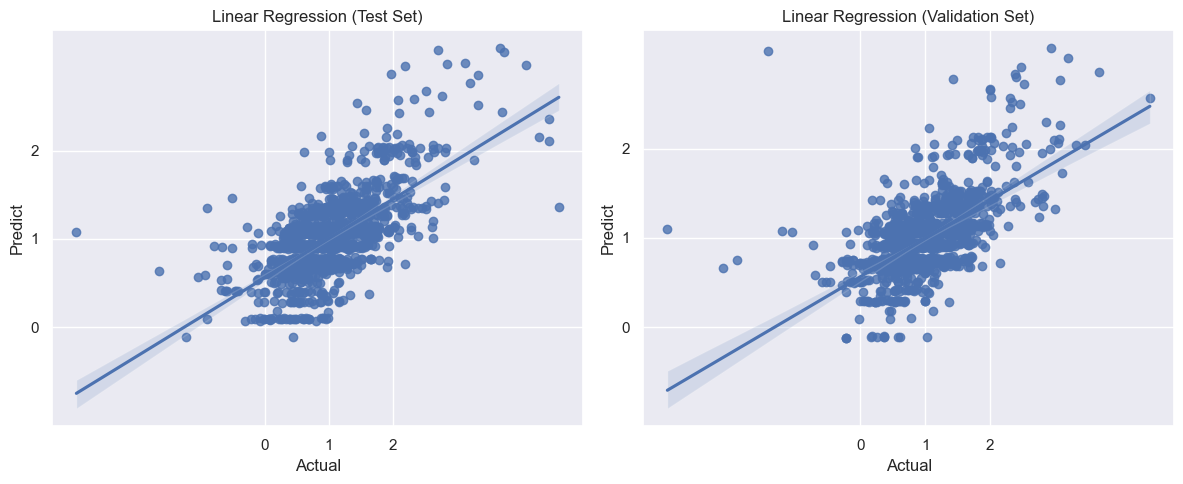

In [588]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ về dự đoán và giá trị thực tế trên tập kiểm tra
ax1 = axes[0]
sns.regplot(x=y_test_randomforest, y=y_test_pred, ax=ax1)
ax1.set_title('Linear Regression (Test Set)')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predict')
ax1.set_xticks(range(0, 3, 1))
ax1.set_yticks(range(0, 3, 1))

# Biểu đồ về dự đoán và giá trị thực tế trên tập validation
ax2 = axes[1]
sns.regplot(x=y_val_randomforest, y=y_val_pred, ax=ax2)
ax2.set_title('Linear Regression (Validation Set)')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predict')
ax2.set_xticks(range(0, 3, 1))
ax2.set_yticks(range(0, 3, 1))

plt.tight_layout()
plt.show()


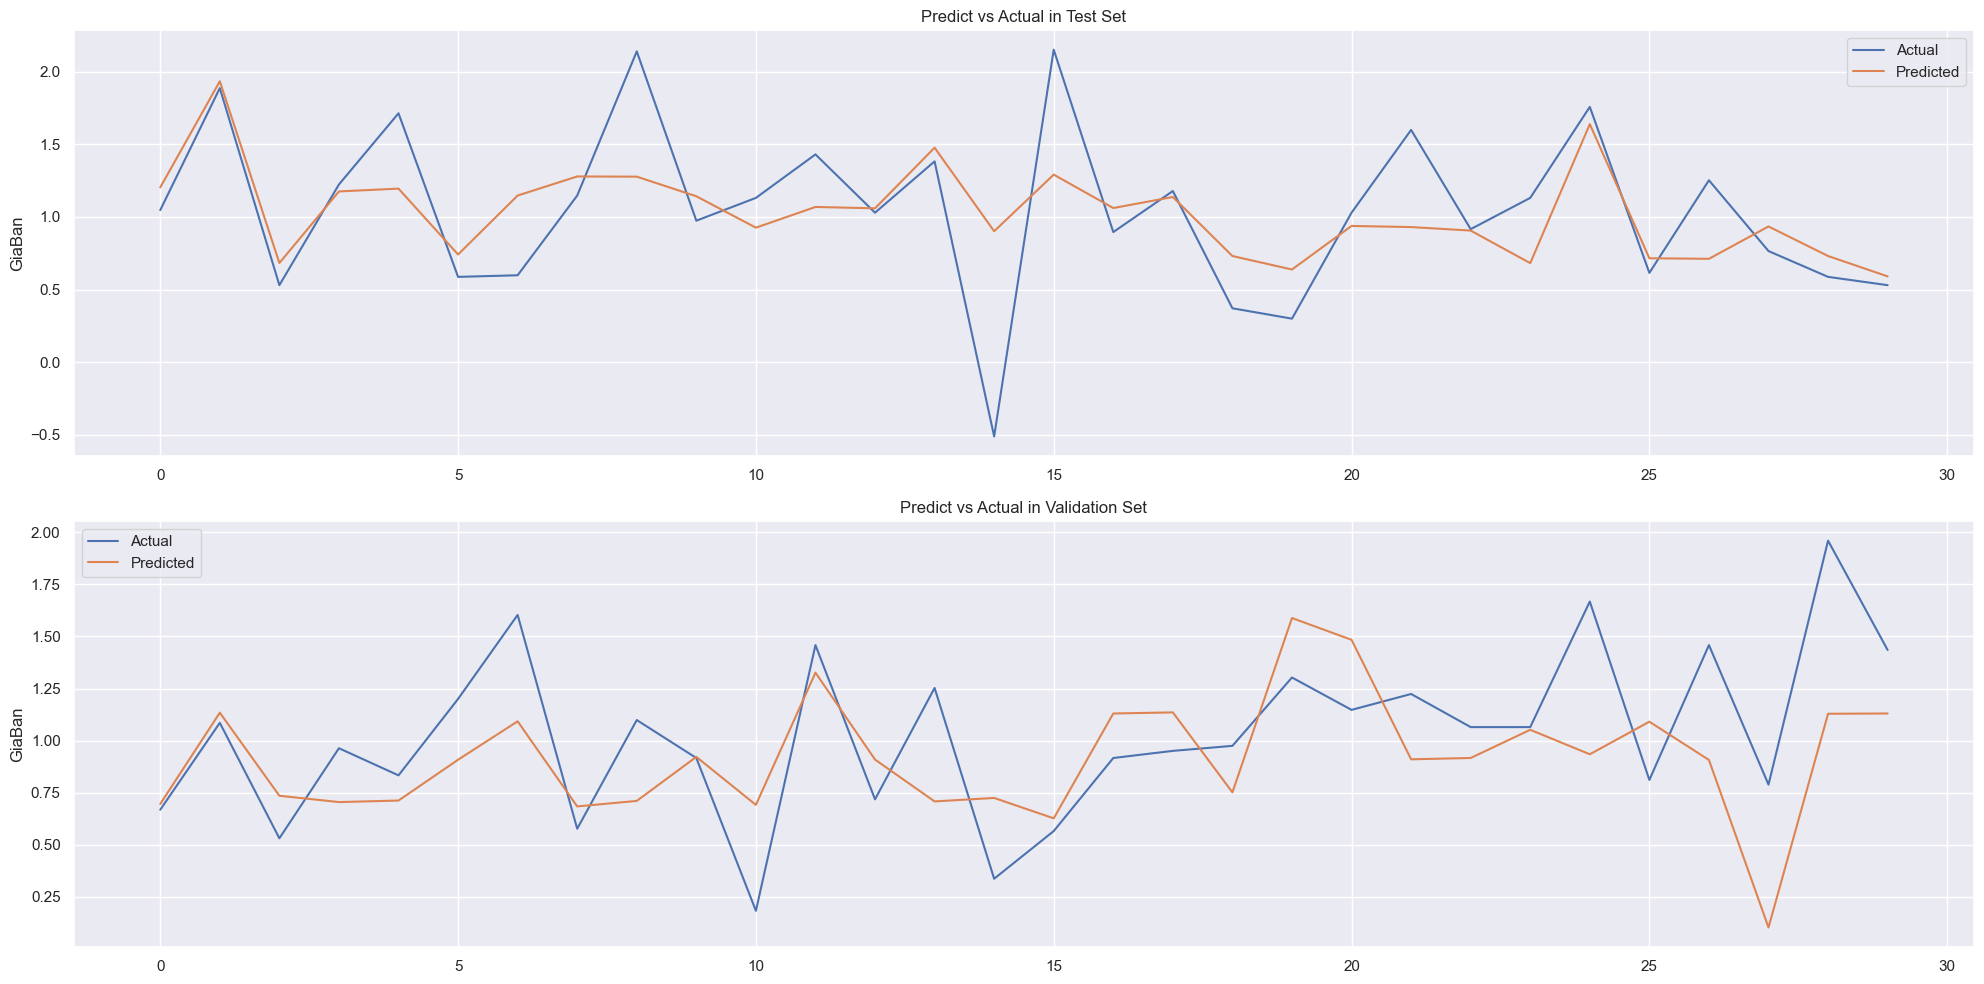

In [589]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].set_ylabel("GiaBan")
axes[0].set_title('Predict vs Actual in Test Set')
axes[0].plot(np.array(y_test_randomforest[:30]), label='Actual')
axes[0].plot(y_test_pred[:30], label='Predicted')
axes[0].legend()

axes[1].set_ylabel("GiaBan")
axes[1].set_title('Predict vs Actual in Validation Set')
axes[1].plot(np.array(y_val_randomforest[:30]), label='Actual')
axes[1].plot(y_val_pred[:30], label='Predicted')
axes[1].legend()

plt.tight_layout()
plt.show()


In [590]:
from tabulate import tabulate

# Tạo DataFrame chứa các giá trị trước và sau tối ưu
data = {'Metric': ['R2-score', 'MAE', 'MSE', 'RMSE'],
        'Before Optimization (Validation)': [r2_val_before, mae_val_before, mse_val_before, rmse_val_before],
        'After Optimization (Validation)': [r2_val_after, mae_val_after, mse_val_after, rmse_val_after],
        'Before Optimization (Test)': [r2_test_before, mae_test_before, mse_test_before, rmse_test_before],
        'After Optimization (Test)': [r2_test_after, mae_test_after, mse_test_after, rmse_test_after]}

# In bảng so sánh các giá trị trước và sau tối ưu
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))
print()



╒══════════╤════════════════════════════════════╤═══════════════════════════════════╤══════════════════════════════╤═════════════════════════════╕
│ Metric   │   Before Optimization (Validation) │   After Optimization (Validation) │   Before Optimization (Test) │   After Optimization (Test) │
╞══════════╪════════════════════════════════════╪═══════════════════════════════════╪══════════════════════════════╪═════════════════════════════╡
│ R2-score │                            0.16839 │                           0.37818 │                      0.27601 │                     0.43575 │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼─────────────────────────────┤
│ MAE      │                            0.3782  │                           0.32538 │                      0.38911 │                     0.33824 │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼──

### Sử dụng mô hình GradientBoostingRegressor

In [591]:
X_train_boot = X_train_b.copy()
X_test_boot = X_test_b.copy()
X_val_boot = X_val_b.copy()
y_train_boot = y_train_b.copy()
y_test_boot = y_test_b.copy()
y_val_boot = y_val_b.copy()

In [592]:
model = GradientBoostingRegressor(random_state = 20)

model.fit(X_train_boot, y_train_boot)

y_val_pred = model.predict(X_val_boot)
r2_val_before = r2_score(y_val_boot, y_val_pred).round(5)

y_test_pred = model.predict(X_test_boot)
r2_test_before = r2_score(y_test_boot, y_test_pred).round(5)

mae_val_before = mean_absolute_error(y_val_boot, y_val_pred).round(5)
mae_test_before = mean_absolute_error(y_test_boot, y_test_pred).round(5)

mse_val_before = mean_squared_error(y_val_boot,y_val_pred).round(5)
mse_test_before = mean_squared_error(y_test_boot,y_test_pred).round(5)

rmse_val_before= mean_squared_error(y_val_boot, y_val_pred, squared=False).round(5)
rmse_test_before= mean_squared_error(y_test_boot, y_test_pred, squared=False).round(5)

print("R2-score in validation: ", r2_val_before)
print("R2-score in test: ", r2_test_before)
print()
print("Test error (MAE) in validation: {}".format(mae_val_before))
print("Test error (MAE) in  test: {}".format(mae_test_before))
print()
print("Test error (MSE) in validation: {}".format(mse_val_before))
print("Test error (MSE) in test: {}".format(mse_test_before))
print()
print("Test error (RMSE) in validation: {}".format(rmse_val_before))
print("Test error (RMSE) in test: {}".format(rmse_test_before))
print
df = pd.DataFrame({'Giá trị nhãn đúng': y_val_boot, 'Nhãn dự đoán': y_val_pred, 'Chênh lệch': abs(y_val_boot - y_val_pred)})
print(df)


R2-score in validation:  0.32065
R2-score in test:  0.38091

Test error (MAE) in validation: 0.3471
Test error (MAE) in  test: 0.35549

Test error (MSE) in validation: 0.22786
Test error (MSE) in test: 0.2381

Test error (RMSE) in validation: 0.47735
Test error (RMSE) in test: 0.48796
      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
3048           0.667829      0.633967    0.033862
3591           1.085189      1.032586    0.052604
4967           0.530628      0.785330    0.254702
303            0.963174      0.607149    0.356026
7099           0.832909      0.578758    0.254151
...                 ...           ...         ...
2022           1.420696      1.127285    0.293411
2530           0.506818      0.718964    0.212147
4235           1.481605      0.730470    0.751134
4141           0.470004      0.294647    0.175356
7355           0.641854      0.712536    0.070683

[1634 rows x 3 columns]


## Hiệu Chỉnh mô hình

In [593]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('gradientboost', GradientBoostingRegressor(random_state=20))  # Gradient Boosting model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'gradientboost__n_estimators': [50, 100, 200, 300],  # Number of estimators
    'gradientboost__learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'gradientboost__max_depth': [3, 4, 5, 6]  # Max depth
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_boot, y_train_boot)

best_model = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))


Best parameters: {'gradientboost__learning_rate': 0.05, 'gradientboost__max_depth': 5, 'gradientboost__n_estimators': 300}


In [594]:
pipeline = Pipeline([
    ('gradientboost', GradientBoostingRegressor(n_estimators = 100, max_depth = 4, learning_rate= 0.1,random_state=20))  # Gradient Boosting model
])
pipeline.fit(X_train_boot, y_train_boot)


y_val_pred = pipeline.predict(X_val_boot)
r2_val_after = r2_score(y_val_boot, y_val_pred).round(5)

y_test_pred = pipeline.predict(X_test_boot)
r2_test_after= r2_score(y_test_boot, y_test_pred).round(5)

mae_test_after = mean_absolute_error(y_test_boot,y_test_pred).round(5)
mae_val_after = mean_absolute_error(y_val_boot,y_val_pred).round(5)

mse_test_after = mean_squared_error(y_test_boot,y_test_pred).round(5)
mse_val_after = mean_squared_error(y_val_boot,y_val_pred).round(5)

rmse_test_after = mean_squared_error(y_test_boot,y_test_pred,squared = False).round(5)
rmse_val_after = mean_squared_error(y_val_boot,y_val_pred,squared = False).round(5)

# In ra giá trị R2-score
print("R2-score trên tập validation:", r2_val_after)
print("R2-score trên tập test:", r2_test_after)
print()
print("Test error (MAE) in validation: {}".format(mae_val_after))
print("Test error (MAE) in test: {}".format(mae_test_after))
print()
print("Test error (MSE) in validation: {}".format(mse_val_after))
print("Test error (MSE) in test: {}".format(mse_test_after))
print()
print("Test error (RMSE) in validation: {}".format(rmse_val_after))
print("Test error (RMSE) in test: {}".format(rmse_test_after))
print()

# Tạo DataFrame chứa nhãn đúng và nhãn dự đoán
df = pd.DataFrame({'Giá trị nhãn đúng': y_test_boot, 'Nhãn dự đoán': y_test_pred,'Chênh lệch': abs(y_test_boot-y_test_pred)})
print(df)


R2-score trên tập validation: 0.29271
R2-score trên tập test: 0.34753

Test error (MAE) in validation: 0.35289
Test error (MAE) in test: 0.36455

Test error (MSE) in validation: 0.23723
Test error (MSE) in test: 0.25094

Test error (RMSE) in validation: 0.48707
Test error (RMSE) in test: 0.50094

      Giá trị nhãn đúng  Nhãn dự đoán  Chênh lệch
7582           1.047319      1.093870    0.046551
1090           1.887070      1.432781    0.454288
6008           0.530628      0.633245    0.102617
3773           1.223775      1.401056    0.177281
6473           1.713798      1.041676    0.672122
...                 ...           ...         ...
668            0.500775      0.818086    0.317311
7535           0.614585      1.037369    0.422784
7124           0.693147      1.031972    0.338825
7474           0.765468      0.839635    0.074167
2762           0.974560      1.337925    0.363365

[1634 rows x 3 columns]


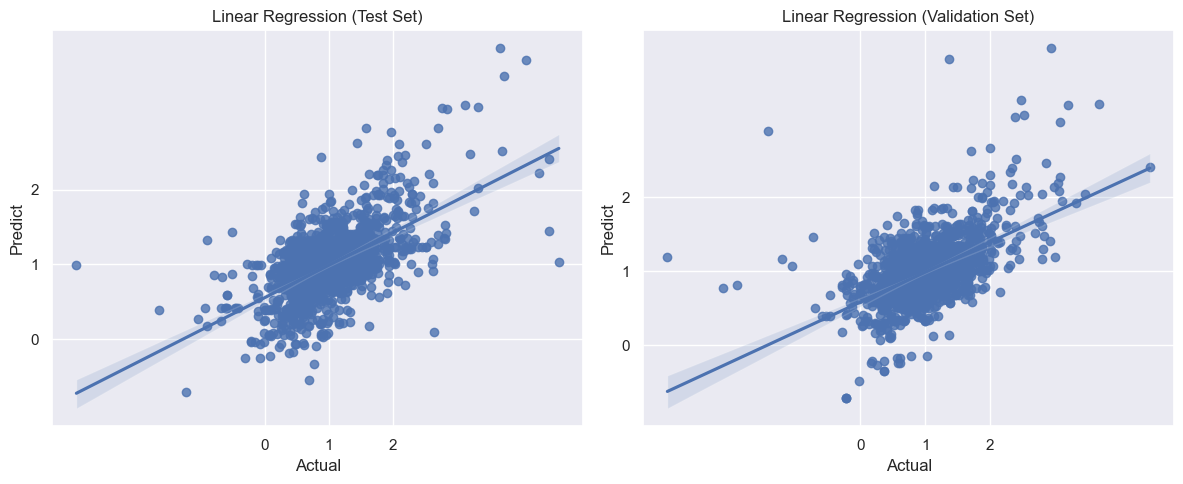

In [595]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ về dự đoán và giá trị thực tế trên tập kiểm tra
ax1 = axes[0]
sns.regplot(x=y_test_boot, y=y_test_pred, ax=ax1)
ax1.set_title('Linear Regression (Test Set)')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predict')
ax1.set_xticks(range(0, 3, 1))
ax1.set_yticks(range(0, 3, 1))

# Biểu đồ về dự đoán và giá trị thực tế trên tập validation
ax2 = axes[1]
sns.regplot(x=y_val_boot, y=y_val_pred, ax=ax2)
ax2.set_title('Linear Regression (Validation Set)')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predict')
ax2.set_xticks(range(0, 3, 1))
ax2.set_yticks(range(0, 3, 1))

plt.tight_layout()
plt.show()


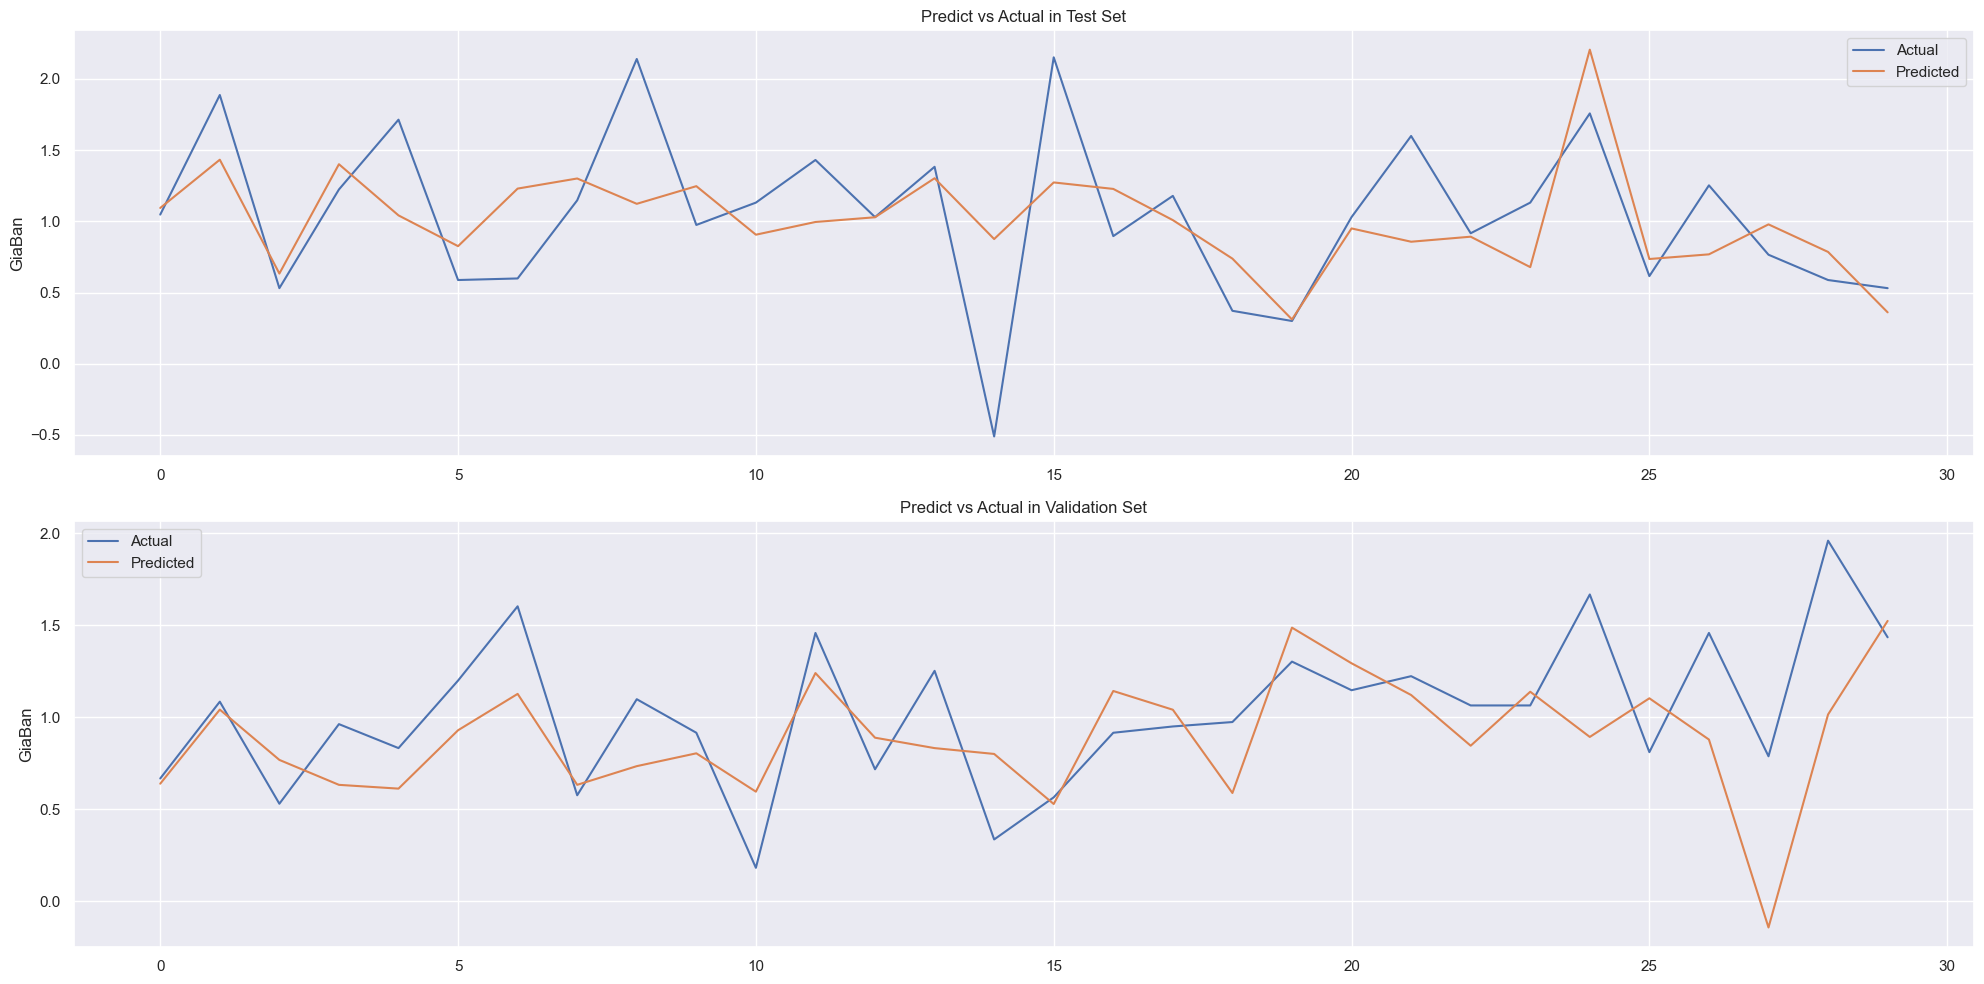

In [596]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Biểu đồ cho tập kiểm tra
axes[0].set_ylabel("GiaBan")
axes[0].set_title('Predict vs Actual in Test Set')
axes[0].plot(np.array(y_test_boot[:30]), label='Actual')
axes[0].plot(y_test_pred[:30], label='Predicted')
axes[0].legend()

# Biểu đồ cho tập validation
axes[1].set_ylabel("GiaBan")
axes[1].set_title('Predict vs Actual in Validation Set')
axes[1].plot(np.array(y_val_boot[:30]), label='Actual')
axes[1].plot(y_val_pred[:30], label='Predicted')
axes[1].legend()

plt.tight_layout()
plt.show()


In [597]:
from tabulate import tabulate

# Tạo DataFrame chứa các giá trị trước và sau tối ưu
data = {'Metric': ['R2-score', 'MAE', 'MSE', 'RMSE'],
        'Before Optimization (Validation)': [r2_val_before, mae_val_before, mse_val_before, rmse_val_before],
        'After Optimization (Validation)': [r2_val_after, mae_val_after, mse_val_after, rmse_val_after],
        'Before Optimization (Test)': [r2_test_before, mae_test_before, mse_test_before, rmse_test_before],
        'After Optimization (Test)': [r2_test_after, mae_test_after, mse_test_after, rmse_test_after]}

# In bảng so sánh các giá trị trước và sau tối ưu
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))
print()



╒══════════╤════════════════════════════════════╤═══════════════════════════════════╤══════════════════════════════╤═════════════════════════════╕
│ Metric   │   Before Optimization (Validation) │   After Optimization (Validation) │   Before Optimization (Test) │   After Optimization (Test) │
╞══════════╪════════════════════════════════════╪═══════════════════════════════════╪══════════════════════════════╪═════════════════════════════╡
│ R2-score │                            0.32065 │                           0.29271 │                      0.38091 │                     0.34753 │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼─────────────────────────────┤
│ MAE      │                            0.3471  │                           0.35289 │                      0.35549 │                     0.36455 │
├──────────┼────────────────────────────────────┼───────────────────────────────────┼──────────────────────────────┼──

In [598]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
linear_pipeline = Pipeline([
    ('linear', LinearRegression())  
])

randomforest_pipeline = Pipeline([
    ('randomforest', RandomForestRegressor(max_depth = 5, min_samples_split = 10, n_estimators = 300,random_state=20))  # Mô hình Random Forest Regression
])

gradientboost_pipeline = Pipeline([
    ('gradientboost', GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.05, random_state=20))  # Mô hình Gradient Boosting Regression
])

stacked_model = StackingRegressor(
    estimators=[('linear', linear_pipeline), ('randomforest', randomforest_pipeline), ('gradientboost', gradientboost_pipeline)]
)

stacked_model.fit(X_train_b, y_train_b)


y_val_pred_stacked = stacked_model.predict(X_val_b)

r2_val_btacked = r2_score(y_val_b, y_val_pred_stacked)
mse_val_btacked = mean_squared_error(y_val_b, y_val_pred_stacked)
mae_val_btacked = mean_absolute_error(y_val_b, y_val_pred_stacked)

y_test_pred_stacked = stacked_model.predict(X_test_b)

r2_test_btacked = r2_score(y_test_b, y_test_pred_stacked)
mse_test_btacked = mean_squared_error(y_test_b, y_test_pred_stacked)
mae_test_btacked = mean_absolute_error(y_test_b, y_test_pred_stacked)

# In các độ đo đánh giá
print("R2-score on validation set (Stacked Model):", r2_val_btacked)
print("MSE on validation set (Stacked Model):", mse_val_btacked)
print("MAE on validation set (Stacked Model):", mae_val_btacked)
print()
print("R2-score on test set (Stacked Model):", r2_test_btacked)
print("MSE on test set (Stacked Model):", mse_test_btacked)
print("MAE on test set (Stacked Model):", mae_test_btacked)


R2-score on validation set (Stacked Model): 0.27868525398926125
MSE on validation set (Stacked Model): 0.24193888865945246
MAE on validation set (Stacked Model): 0.3590316004322575

R2-score on test set (Stacked Model): 0.3461138103688023
MSE on test set (Stacked Model): 0.2514842757479417
MAE on test set (Stacked Model): 0.36616633697110496
